<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_3_6)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,39.040981,23.773262,38.313210,2.076469e-03,111.129530,111.127488,0.002042
1,0.0,1.0,85.387274,93.899912,83.085703,-5.209594e-04,272.372368,272.372917,-0.000549
2,0.0,2.0,51.853011,78.833821,82.875542,3.628822e-05,223.562410,223.562345,0.000065
3,0.0,3.0,37.557261,20.840006,81.333015,-6.729237e-05,149.730215,149.730419,-0.000204
4,0.0,4.0,30.823039,94.501666,40.581951,-1.043055e-04,175.906552,175.906403,0.000149
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,68.652437,58.340276,41.345419,-1.265215e-04,178.338005,178.337879,0.000126
119996,999.0,116.0,43.676686,31.612638,33.409262,1.569235e-03,118.700155,118.698375,0.001780
119997,999.0,117.0,46.695348,82.803603,45.439596,-4.178533e-07,184.938547,184.938630,-0.000083
119998,999.0,118.0,91.848078,67.536872,86.809311,-9.327183e-05,256.194168,256.194067,0.000102


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3             e           Y  \
rep   index                                                              
0.0   0.0    39.040981  23.773262  38.313210  2.076469e-03  111.129530   
      1.0    85.387274  93.899912  83.085703 -5.209594e-04  272.372368   
      2.0    51.853011  78.833821  82.875542  3.628822e-05  223.562410   
      3.0    37.557261  20.840006  81.333015 -6.729237e-05  149.730215   
      4.0    30.823039  94.501666  40.581951 -1.043055e-04  175.906552   
...                ...        ...        ...           ...         ...   
999.0 115.0  68.652437  58.340276  41.345419 -1.265215e-04  178.338005   
      116.0  43.676686  31.612638  33.409262  1.569235e-03  118.700155   
      117.0  46.695348  82.803603  45.439596 -4.178533e-07  184.938547   
      118.0  91.848078  67.536872  86.809311 -9.327183e-05  256.194168   
      119.0  22.229705  96.610485  23.362402  2.223854e-04  152.202815   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    111.127488  0.002042  
      1.0    272.372917 -0.000549  
      2.0    223.562345  0.000065  
      3.0    149.730419 -0.000204  
      4.0    175.906403  0.000149  
...                 ...       ...  
999.0 115.0  178.337879  0.000126  
      116.0  118.698375  0.001780  
      117.0  184.938630 -0.000083  
      118.0  256.194067  0.000102  
      119.0  152.202856 -0.000041  

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3             e           Y  \
rep   index                                                              
0.0   0.0    39.040981  23.773262  38.313210  2.076469e-03  111.129530   
      1.0    85.387274  93.899912  83.085703 -5.209594e-04  272.372368   
      2.0    51.853011  78.833821  82.875542  3.628822e-05  223.562410   
      3.0    37.557261  20.840006  81.333015 -6.729237e-05  149.730215   
      4.0    30.823039  94.501666  40.581951 -1.043055e-04  175.906552   
...                ...        ...        ...           ...         ...   
999.0 115.0  68.652437  58.340276  41.345419 -1.265215e-04  178.338005   
      116.0  43.676686  31.612638  33.409262  1.569235e-03  118.700155   
      117.0  46.695348  82.803603  45.439596 -4.178533e-07  184.938547   
      118.0  91.848078  67.536872  86.809311 -9.327183e-05  256.194168   
      119.0  22.229705  96.610485  23.362402  2.223854e-04  152.202815   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    111.127488  0.002042  
      1.0    272.372917 -0.000549  
      2.0    223.562345  0.000065  
      3.0    149.730419 -0.000204  
      4.0    175.906403  0.000149  
...                 ...       ...  
999.0 115.0  178.337879  0.000126  
      116.0  118.698375  0.001780  
      117.0  184.938630 -0.000083  
      118.0  256.194067  0.000102  
      119.0  152.202856 -0.000041  

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,39.040981,23.773262,38.313210,2.076469e-03,111.129530,111.127488,0.002042
1,0.0,1.0,85.387274,93.899912,83.085703,-5.209594e-04,272.372368,272.372917,-0.000549
2,0.0,2.0,51.853011,78.833821,82.875542,3.628822e-05,223.562410,223.562345,0.000065
3,0.0,3.0,37.557261,20.840006,81.333015,-6.729237e-05,149.730215,149.730419,-0.000204
4,0.0,4.0,30.823039,94.501666,40.581951,-1.043055e-04,175.906552,175.906403,0.000149
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,68.652437,58.340276,41.345419,-1.265215e-04,178.338005,178.337879,0.000126
119996,999.0,116.0,43.676686,31.612638,33.409262,1.569235e-03,118.700155,118.698375,0.001780
119997,999.0,117.0,46.695348,82.803603,45.439596,-4.178533e-07,184.938547,184.938630,-0.000083
119998,999.0,118.0,91.848078,67.536872,86.809311,-9.327183e-05,256.194168,256.194067,0.000102


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3             e           Y  \
rep   index                                                              
0.0   0.0    39.040981  23.773262  38.313210  2.076469e-03  111.129530   
      1.0    85.387274  93.899912  83.085703 -5.209594e-04  272.372368   
      2.0    51.853011  78.833821  82.875542  3.628822e-05  223.562410   
      3.0    37.557261  20.840006  81.333015 -6.729237e-05  149.730215   
      4.0    30.823039  94.501666  40.581951 -1.043055e-04  175.906552   
...                ...        ...        ...           ...         ...   
999.0 115.0  68.652437  58.340276  41.345419 -1.265215e-04  178.338005   
      116.0  43.676686  31.612638  33.409262  1.569235e-03  118.700155   
      117.0  46.695348  82.803603  45.439596 -4.178533e-07  184.938547   
      118.0  91.848078  67.536872  86.809311 -9.327183e-05  256.194168   
      119.0  22.229705  96.610485  23.362402  2.223854e-04  152.202815   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    111.127488  0.002042  
      1.0    272.372917 -0.000549  
      2.0    223.562345  0.000065  
      3.0    149.730419 -0.000204  
      4.0    175.906403  0.000149  
...                 ...       ...  
999.0 115.0  178.337879  0.000126  
      116.0  118.698375  0.001780  
      117.0  184.938630 -0.000083  
      118.0  256.194067  0.000102  
      119.0  152.202856 -0.000041  

[120000 rows x 7 columns]

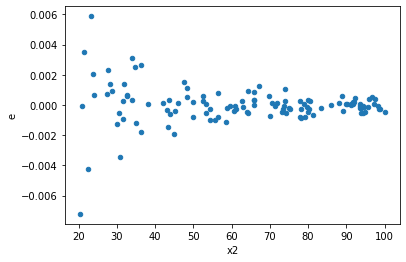

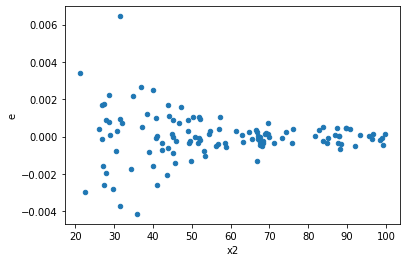

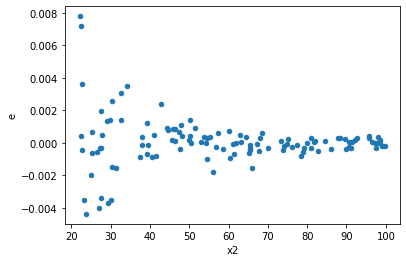

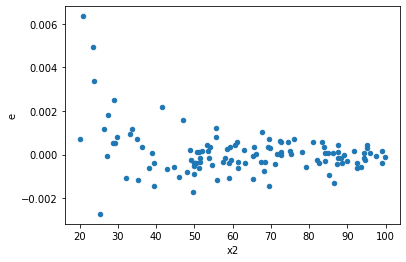

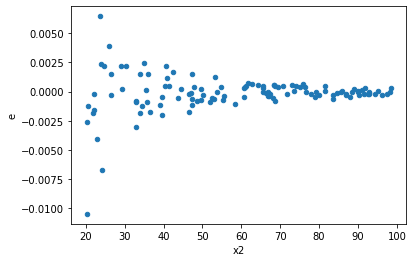

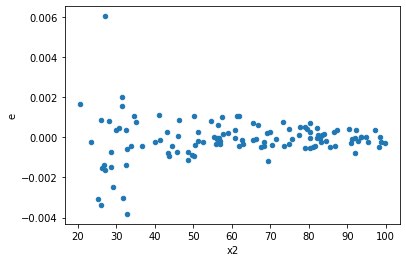

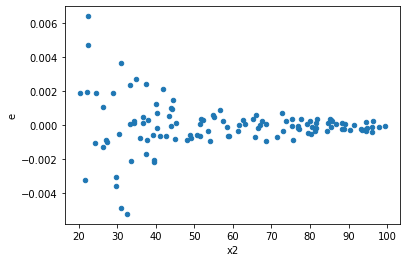

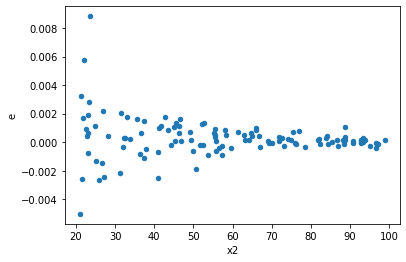

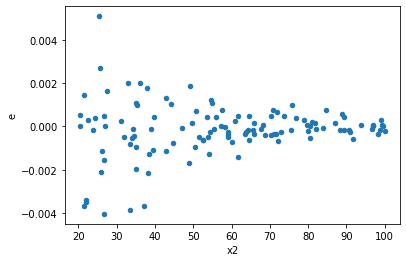

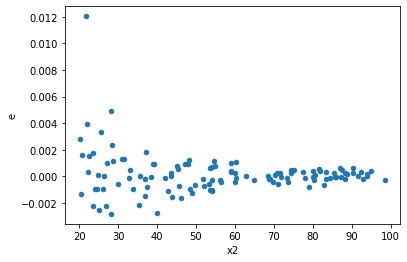

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,66.0,48.0,3.837743546587084e-05,8.621539271935012e-05,5.814762949374369e-07,1.7961540149864608e-06,3.088954838958165,7.481313329282813e-05,0.9999625934333536,3.740656664641406e-05,Reject001=0 : Heteroscedasticity
4.0,60.0,54.0,2.674522402189578e-05,0.0002819220681494437,4.45753733698263e-07,5.220779039804513e-06,11.712249713512286,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
7.0,54.0,60.0,8.722049188143707e-05,0.0001255704861839857,1.6151942941006864e-06,2.092841436399762e-06,1.2957211674432156,0.3281515422878869,0.8359242288560566,0.16407577114394345,Reject001=1 : Homoscedasticity
9.0,59.0,55.0,4.39117388843786e-05,0.00024365111420278712,7.442667607521797e-07,4.430020258232493e-06,5.952194148446686,3.7424374710326447e-10,0.9999999998128781,1.8712187355163223e-10,Reject001=0 : Heteroscedasticity
10.0,56.0,58.0,5.159159846823182e-05,0.0001727272829638347,9.212785440755682e-07,2.9780566028247363e-06,3.232525734996885,1.6533323538459044e-05,0.9999917333382308,8.266661769229522e-06,Reject001=0 : Heteroscedasticity
16.0,47.0,67.0,2.8759175302660375e-05,0.00019989133065921388,6.118973468651144e-07,2.983452696406177e-06,4.87574053342618,4.810647880049146e-09,0.9999999975946761,2.405323940024573e-09,Reject001=0 : Heteroscedasticity
17.0,40.0,74.0,1.2427875753933733e-05,0.00019934352824471844,3.106968938483433e-07,2.6938314627664652e-06,8.670287718039988,2.886579864025407e-15,0.9999999999999986,1.4432899320127035e-15,Reject001=0 : Heteroscedasticity
20.0,65.0,49.0,4.3864440882565236e-05,0.00015105373034328504,6.748375520394652e-07,3.0827291906792865e-06,4.568105585355756,1.6211026521162353e-07,0.9999999189448674,8.105513260581176e-08,Reject001=0 : Heteroscedasticity
21.0,68.0,46.0,0.00011453964837808107,0.00037920063266620204,1.6844065937953097e-06,8.243492014482654e-06,4.894003647841578,9.470785289344974e-08,0.9999999526460736,4.735392644672487e-08,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,55.0,59.0,0.0001805514565728693,1.8476971349009602e-05,3.2827537558703507e-06,3.1316900591541697e-07,0.09539826292343606,1.7696070105290507e-15,Reject001=0 : Heteroscedasticity
1.0,59.0,55.0,0.00014286431114242222,3.437577392532597e-05,2.421429002413936e-06,6.250140713695631e-07,0.25811785963845446,7.422251022739345e-07,Reject001=0 : Heteroscedasticity
2.0,59.0,55.0,0.0001952812622447488,7.99572232393297e-05,3.3098519024533694e-06,1.45376769526054e-06,0.4392243937509591,0.002170899612664457,Reject001=0 : Heteroscedasticity
3.0,66.0,48.0,3.837743546587084e-05,8.621539271935012e-05,5.814762949374369e-07,1.7961540149864608e-06,3.088954838958165,7.481313329282813e-05,Reject001=0 : Heteroscedasticity
4.0,60.0,54.0,2.674522402189578e-05,0.0002819220681494437,4.45753733698263e-07,5.220779039804513e-06,11.712249713512286,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,71.0,43.0,0.0001132266837226703,1.243771158405738e-05,1.594742024262962e-06,2.892491066059856e-07,0.18137673818413805,2.729853653770601e-10,Reject001=0 : Heteroscedasticity
6.0,53.0,61.0,0.00020828015898076196,2.65037083935908e-05,3.929814320391735e-06,4.344870228457508e-07,0.11056171804128392,1.0092614255136583e-13,Reject001=0 : Heteroscedasticity
7.0,54.0,60.0,8.722049188143707e-05,0.0001255704861839857,1.6151942941006864e-06,2.092841436399762e-06,1.2957211674432156,0.3281515422878869,Reject001=1 : Homoscedasticity
8.0,66.0,48.0,0.00013937621719351822,3.2041833881069176e-05,2.1117608665684578e-06,6.675382058556078e-07,0.3161050175820028,1.6937158903513832e-05,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    870
Reject001=1 : Homoscedasticity      130
Name: Result_test, dtype: int64